In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np

## Dataset

In [72]:
# load training data
train = pd.read_csv("train.csv").values
X = train[:, 1:]
y = train[:, 0]
y = np.eye(10)[y]
print(X.shape, y.shape)

(42000, 784) (42000, 10)


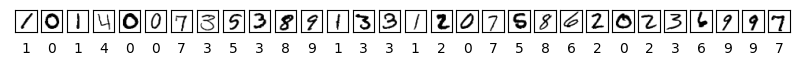

In [73]:
# show some images
plt.figure(figsize=(10, 10))
for i in range(30):
     plt.subplot(1, 30, i + 1)
     plt.xticks([])
     plt.yticks([])
     plt.grid(False)
     plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
     plt.xlabel(np.argmax(y[i]))

## Model

In [75]:
# Load the images in the input folder

batch_size = 32
buffer_size = 1000

datasetTrain = tf.data.Dataset.from_tensor_slices((X, y)).shuffle(buffer_size).batch(batch_size)

# Create the base model from the pre-trained model MobileNet V2
def create_model():
     model = Sequential([
          layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
          layers.Dense(64, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(10, activation='softmax')
     ])
     
     model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
     return model

model = create_model()
model.summary()

history = {
    'loss': [],
    'accuracy': []
}


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


## Load Model

In [4]:
# load model
model = tf.keras.models.load_model("model.h5")

## Train Model and Save

Epoch 1/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0034 - accuracy: 0.9960
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0037 - accuracy: 0.9965
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0040 - accuracy: 0.9960
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0030 - accuracy: 0.9972
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0034 - accuracy: 0.9966
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0042 - accuracy: 0.9964
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0042 - accuracy: 0.9959
Epoch 8/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0022 - accuracy: 0.9975
Epoch 9/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0031 - accuracy: 0.9967
Epoch 10/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.003

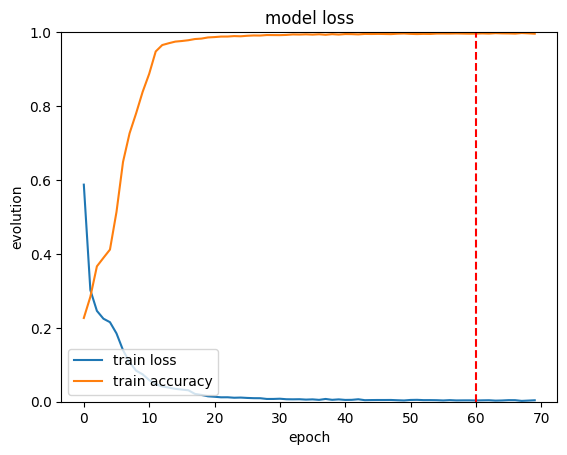

In [90]:
modelLink = "model2.h5"

# Entraîner le modèle avec le dataset
model.fit(datasetTrain, epochs=10)

# Sauvegarder le modèle
model.save(modelLink)

for i in range(len(model.history.history["loss"])):
    history["loss"].append(model.history.history["loss"][i])
    history["accuracy"].append(model.history.history["accuracy"][i])


# afficher l'evolution de la perte
plt.plot(history["loss"])
plt.plot(history["accuracy"])

plt.legend(['train loss', 'train accuracy'], loc='lower left')
plt.title('model loss')

plt.xlabel('epoch')
plt.ylabel('evolution')
plt.ylim(0, 1)

# ligne au verticale au point de changement de dataset
plt.axvline(len(history["loss"]) - len(model.history.history["loss"]), color='r', linestyle='--')
plt.show()

## Predict

In [99]:
# load training data
test = pd.read_csv("test.csv").values

# predict
y = model.predict(test)

nres = []
for i in range(len(y)):
     nres.append([i+1, np.argmax(y[i])])

# difference between new and old result
try:
     c = 0
     for i in range(len(nres)):
          if nres[i][1] != res["Label"][i]:
               c += 1
     print(c, "differences")
except:
     pass


# save result
res = pd.DataFrame(nres, columns=["ImageId", "Label"])
res.to_csv("result.csv", index=False)

875/875 [==============================] - 2s 2ms/step
0 differences
